# Import libraries and dataset

In [32]:
import pandas as pd 

In [33]:
data = pd.read_csv('spam.csv')

In [34]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [35]:
x=data['v1']
y=data['v2']

In [36]:
x

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [7]:
y

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

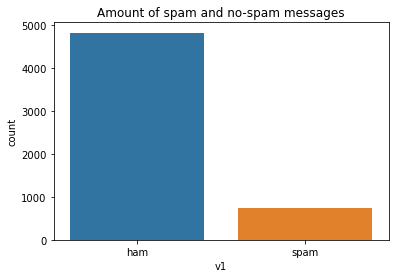

In [38]:
sns.countplot(data = data, x= data["v1"]).set_title("Amount of spam and no-spam messages")
plt.show()

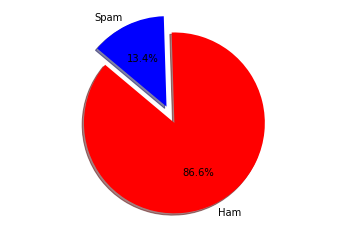

In [39]:
count_Class=pd.value_counts(data.v1, sort= True)

# Data to plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'blue']
explode = (0.1, 0.1)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.10,random_state=20)

In [42]:
x_train

5148    ham
1728    ham
2199    ham
569     ham
4170    ham
       ... 
1607    ham
3915    ham
1428    ham
4367    ham
2522    ham
Name: v1, Length: 5014, dtype: object

In [43]:
x_test

4732    ham
4952    ham
3724    ham
5261    ham
1274    ham
       ... 
2951    ham
4394    ham
3516    ham
2941    ham
4740    ham
Name: v1, Length: 558, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [45]:
vectorizer=TfidfVectorizer()

In [46]:
x_train_vector=vectorizer.fit_transform(x_train)
x_test_vectors = vectorizer.transform(x_test)

In [47]:
from sklearn import svm
model =svm.SVC()
model.fit(x_train_vector,y_train)

SVC()

In [48]:
prediction=model.predict(x_test_vectors)

In [49]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, prediction)
print('Accuracy: '+ str(accuracy*100)+"%")

Accuracy: 0.5376344086021506%
